In [1]:
import pandas as pd
import numpy as np

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, DataInspectionStrategy,SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import  CategoricalUnivariateAnalysis, NumericalUnivariateAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer
from analyze_src.bivariate_analysis import BivariateAnalyzer ,NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)

In [2]:
# Load the data
# Assuming you have already extracted the data into extracted data

data_path = '../extracted_data/AmesHousing.csv'
df = pd.read_csv(data_path)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# Step 1 :Basic Data inspection
# -----------------------------------
# Intialize the Data inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-

In [7]:
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features)


<bound method NDFrame.describe of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     


Misiing Values Count by column :
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Visualizing Missing values...


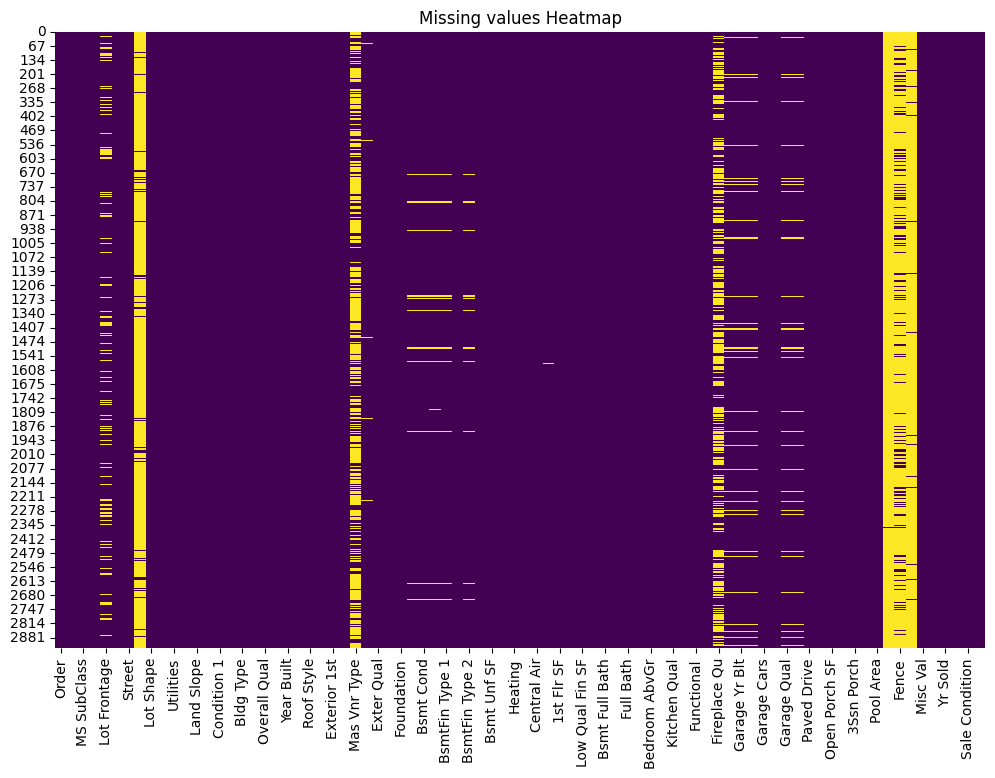

In [8]:
# Step 2: Miising values Analysis
# -----------------------------------------
# Returns Missing Values Analysis 

missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df) 

## Missin Values Heatmap Insights
#### 1. Colors Represents Missingness:
  -  **Yellow:** Represents missing values. The more yellow you see in a column , the more missing data is present in that particular feature.

  -  **Purple (or dark color):** Represents non- missing values. columns that are mostly purple indicate that most of the data is present for that feature.

#### 2. Identifying Columns with Missing Data:
  - Look for columns with significant amounts of yellow. These columns have a higher proportion of missing data.

    -   For instance, in your heatmap, columns like <span style = "color : orange">Lot Frontage, Mas Vnr Type, Mas Vnr Area, Garage Yr Blt & Pool Area</span> have substantial yellow, indicating that these features have missing values.

#### 3 Understanding the Distribution of Missing Data:
 - **Randomly Distributed :** If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be randomly distributed.

 - **Structured Missingness :** If the yellow is clustered in certain rows or columns, it might indicate a non random pattern of missingness. For example, entire rows or coilumns missing could suggest a data collection issues or theta thses features are not applicable in certain cases.

#### 4. Assessing the Severity:
 - Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly.

   -  In your heatmao, some columns have little to no missing values , while others have substantail missingness.    Decision will need to be made on wheather to impute , drop or handle  these features differently.
  

# Insights
#### 1. Data Types and non-null Counts:

- The dataset contains 2930 entries and 82 columns.
  
  - **Data Types :** There are 11 columns with <span style ='color: orange'> float64 </span> datatypes, 28 columns with <span style ='color: orange'> intt64 </span> datatype, and 43 columns with object datatypes. 

  -  **Numerical Features :** These include features like <span style ='color: orange'> Lot Frontage , Lot Area , Overall Qual, Year Built ,</span> etc.,

  -  **Categorical Features :** Features like <span style ="color :orange">Ms Zoning , Street, Neighborhood, Bldg Type,</span> etc., are categorical.


#### 2. Summary Statistics:

- **Numerical Features :**

  -  The target variable <span style = "color: orange">SalePrice</span> has mean of $180,796 with a standard deviation of $79,886 , indicating a significant spread in house prices.

  -  <span style = "color: orange">Overall Qual</span> (Quality of the house) range from 1 to 10 with a mean of **6.09**, showing a relatively high quality on average.

  -  <span style = "color: orange">Year Built</span> ranges from 1872 to 2010, indicating that the datset includes both very old and relatively new houses.

  -  <span style = "color: orange">Lot Area</span> has a wide range, with some extreme outliers (maximumof **215,245 sq.ft**), which might incdicating large properities.
  
  -  The distribution of <span style = "color: orange">Gr Liv Area</span> (above ground living area) shows a mean of **1499 sq.ft** with a wide range , which could significantliy impact <span style = "color: orange">SalePrice</span> 

**Categorical Features :**

  -  **Neighborhood** has 28 unique values , with <span style = "color: orange">Names</span> begin the most common suggesting some neighborhoods might dominate the dataset.

  -  **MS Zoing** is mostly <span style = "color: orange">RL</span> (residently low-density), with **7 unique zoning types.**

  -  <span style = "color: orange">Alley</span> has a high frequency of missing values (discussed below).
  -  Several features related to basements, garges, and exteriro quality vary significantly, which will be crucial in predicting <span style = "color: orange">SalePrice</span>


#### 3. Missing Values Analysis:
 - **Columns with Significant Missing Values :**
   -  <span style = "color: orange">Alley</span> has **2732 missing values** (93.4% missing), making it almost unusable without imputation or transformation.
   
   -  <span style = "color: orange">Pool QC</span> (pool quality) has **2917 missing values** (99.5% missing), indicating that very few houses have pools.

   -  <span style = "color: orange">Fence</span> has **2358  missing values** (80.5% missing), suggesting that many houses do noy have fence or it was not recorded.

   -  <span style = "color: orange">Misc Feature</span> has **2824 missing values** (96.4% missing), indicating that most houses do not have miscellaneous features, or they were not recorded.

 - **Columns with Moderate Missing Values:**
  -  <span style = "color: orange">Garage Type, Garage Yr Blt, Garage Finish, Garage Qual, Garage Cond</span> each have **159 missing values**(~5.4%), likely corresponding to houses without garages.
  -  <span style = "color : orange">Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2</span> each have around **80 missing values** (~2.7%), likely representing houses without basements.
  -  <span style = "color : orange">Mas Vnr Type</span>(masonary veneer type) has **1775 missing values** (`60.6%), and <span style = "color : orange">Mas Vnr Area</span> has **23 missing values**. This might indicating many houses do noy have masonry veneer.
 - **Single Missing Values:**
   -  Several features , such as <span style = "color : orange"> BsmtFin SF 1, Totalbsmt SF, Electrical, Garage Cars, Garage Area,</span> etc., have only one or two missing values, which can likely be imputed without much impact.

### Issues to be Addressed Later
**1.Handling Missing Data:**
 -  **Significant Missing Values :** Columns like <span style = "color : orange">Alley, Pool QC, Fence,</span> and <span style = "color : orange">Misc Feature</span> have a very high percentage of missing data, Decisions need to be made whether to:
  -  Drop these columns entirely, as they might not add significant value.
  -  Impute missing values with a placeholder (e.g "None" or "No Pool") to retain them in the analysis.
 - **Moderate Missing Values :** Features related to basements and garages will require careful handling. Missing values could be filled with "No Basement" or "No Garage" for categorical features, and zeros for numerical  ones.
 - **Single Missing Values :** These can likely be filled with the mode or mean for categorical and numerical features, respectively.
**2. outlier detection and Handling :**
 -  Features like <span style = "color : orange">Lol Area, gr Liv Area,</span> and <span style = "color : orange">SalePrice</span> show a significant range, indicating potential outliers. These will need to be detected and handled appropriately to avoid skewing model predictions.

 **3. Categorical Encoding :**
  -  Categorical features like <span style = "color : orange">Neighborhood, Ms Zoning, Bldg Type</span> and <span style = "color : orange">Exterior 1st</span> have many unique values. Decisions need to be made on how to encode these (e.g., one-hot-encoding,label encoding, or frequency encoding) based on their relationship with the target variable.
**4. Feature Engineering :**
  -  Based on the insights , certain features might need to be engineered (e.g., combining related featues, creating interaction terms, or transforming skewed features) to better capture the relationships in the data.

**5. Correlation and multicollinearity :**
  -  Intial correlation analysis suggests that some features might be highly correlated with each other (eg., basement-related features). This could lead to multicollinearity issues, which need to be addresses during feature selection.

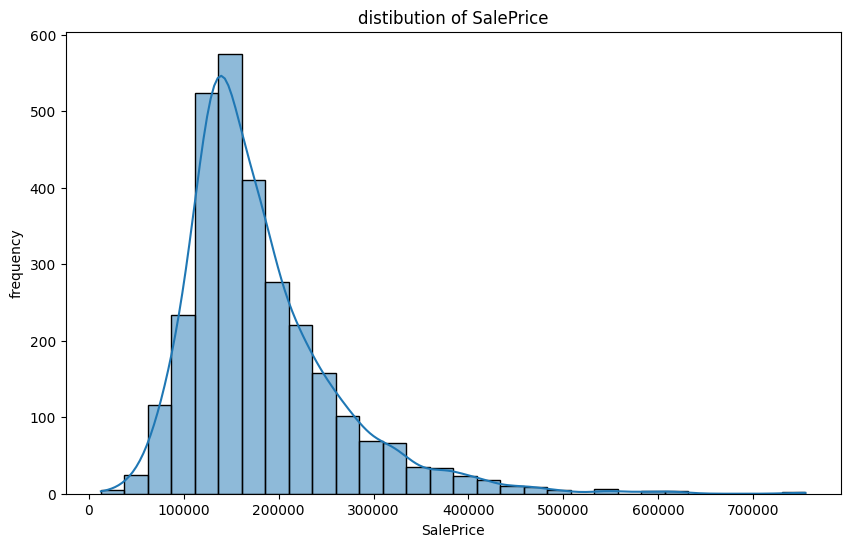

In [8]:
# step 3: univariate Analysis
# -------------------------------------
# Analyzing a numerical Feature

univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analyze(df,'SalePrice')

/home/sarath/Desktop/House_price_prediction/analysis/analyze_src/univariate_analysis.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = feature, data = df,palette = 'muted')


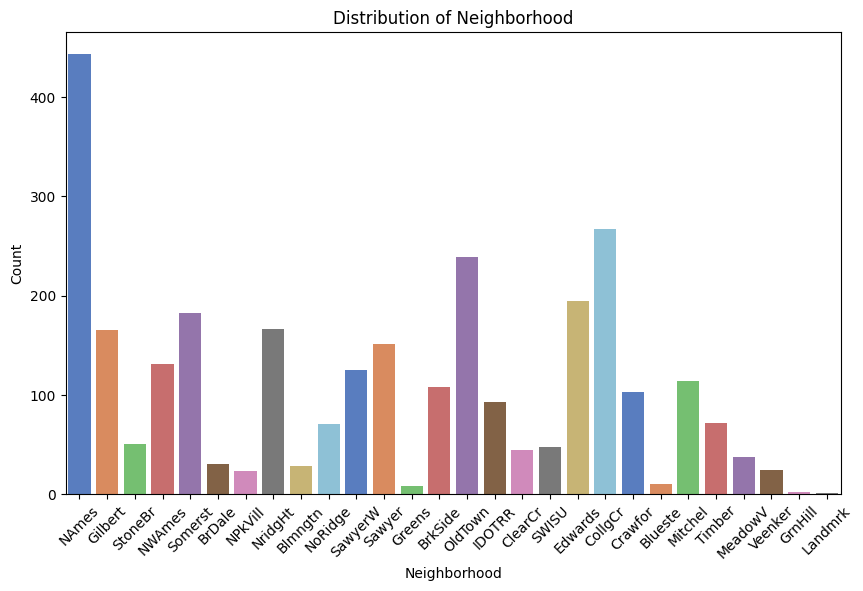

In [9]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analyze(df,'Neighborhood')

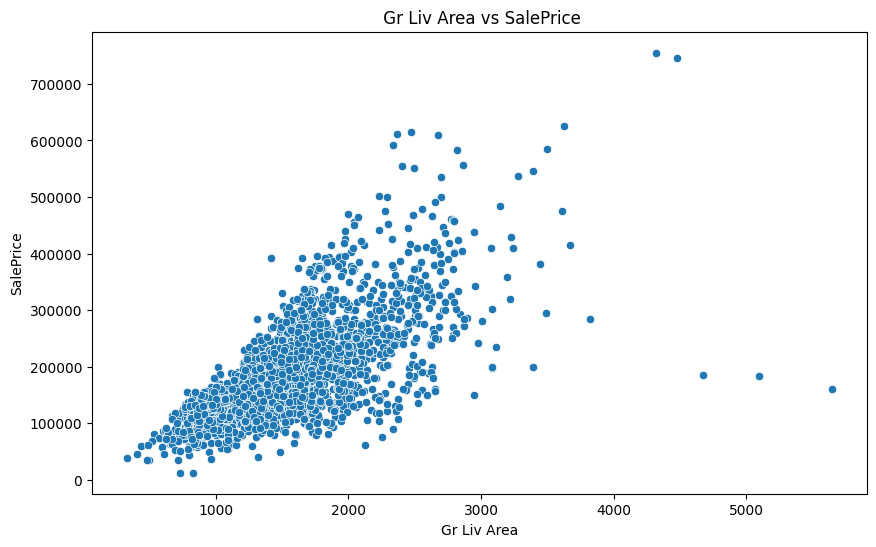

In [4]:
# Step 4 : Bivariate Analysis
# --------------------------------
# Analyzing the relationship between the Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analyze(df,'Gr Liv Area','SalePrice')

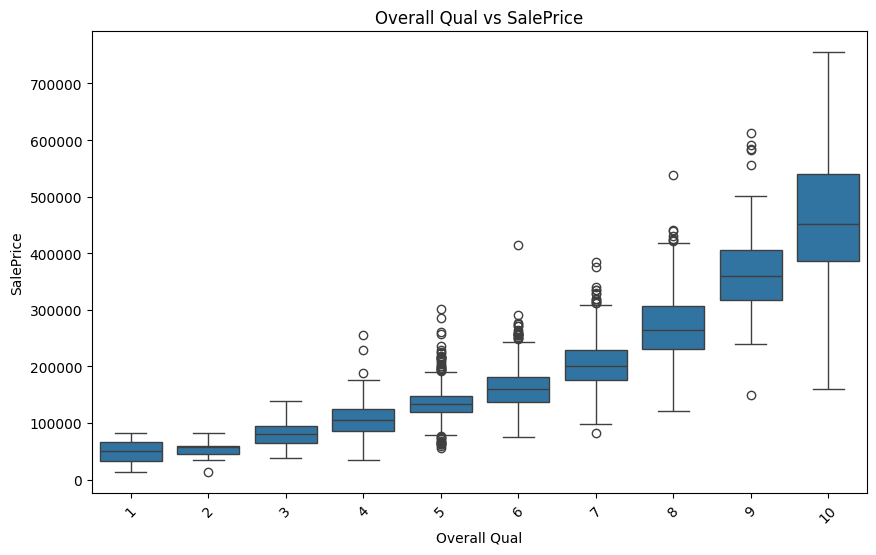

In [5]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analyze(df,'Overall Qual','SalePrice')

# Insights from Univariate and Bivariate Analysis

### Step 3: Univariate Analysis
 - **1.SalePrice Distribution (Numerical Feature) :**
   -  **Insights :** The distribution of <span style = "color : orange">SalesPrice</span> is positive skewed, with the majority of house price falling between $100,000 and $250,000. The peak frequency is around the $200,000 mark.
   -  **Implication :** This skewness suggests that most homes in the dataset are relatively afforable, with fewer high-end properities. This long tail on the right side indicates a small number of more expensive homes, which may need special consideration during (e.g.,applying a log transformation to normlaize the distribution).
 - **Neighborhood Distribution (categorical Feature) :**
   -  **Insight :** The <span style = "color: orange">Neighborhood</span> feature shows a varied distribution, with <span style = "color: orange">NAmes</span> beign the most common neighborhood, followed by <span style = "color: orange">CollgCr</span> and <span style = "color: orange">OldTown</span>.Some neighborhoods have very few observations.
   -  **implication :** The high frequency of certain neighborhoods suggest that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid
   overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together.   

## Step 4: Bivariate Analysis
 1. **Gr LivArea vs. SalesPrice (Numerical vs. Numerical):**
  -  **Insight :** There is a strong positive correlation between <span style = "color : orange">Gr Liv Area</span> (Above Ground Living Area) and <span style = "color : orange">SalePrice</span> indicating that larager homes generally sell for higher prices. The relationship appears mostly linear, but tehre are a few outliers, especially at higher <span style = "color:orange">Liv Area</span> values.
  
  - **Implication:** This linear relationship confirms that <span style = "color:orange">Gr Liv Area</span> is likely a strong predictor of <span style = "color : orange">SalePrice</span>.However , the presence of outliers (large homes with lower han expected prices) might require further investigation to detemine whether they should be treated or removed.
  2. **Overall Qual vs Saleprice (Categorical vs. Numerical)**
   -  **Insight:** There is clear positive relationship between <span style = "color : orange">Overall Qual</span>(Overall Quality) and <span style = "color : orange">SalePrice</span> , with higher quality associated with significanlty higher prices. The box plot shows increasing medians and ranges as quality improves, with some variability in each category.
   -  **Implication:** <span style = "color : orange">Overall Qual</span> is another strong predictor of <span style = "color : orange">SalePrice</span>. The consistent increase in sale price with higher quality ratings suggests that homebuyers highly value quality. The variability within each category might be due to other factors influencing price, such as location or specific, not captured by <span style = "color : orange">Overall Qual</span>.
## Summary:
- **Key Predictors :** Both <span style = "color : orange">Gr Liv Area</span> and <span style = "color : orange">Overall Qual</span> are strong predictors of <span style = "color : orange">SalePrice</span>. These features should be emphaized in any predictive models.
- **Data Distribution :** The positive skew in <span style = "color : orange">SalePrice</span>  and the wide range of values  for both <span style = "color : orange">Gr Liv Area</span> and <span style = "color : orange">Overall Qual</span>  indicate the need for careful data preprocessing, including potential normalization or transformation of features.
- **Outliers :** Outliers in the relationship between <span style = "color : orange">Gr liv Area</span> and <span style = "color : orange">SalePrice</span> need to examined closley, as they may represent special cases(e.g., luxury homes) that could skew the model if not properly addressed. 

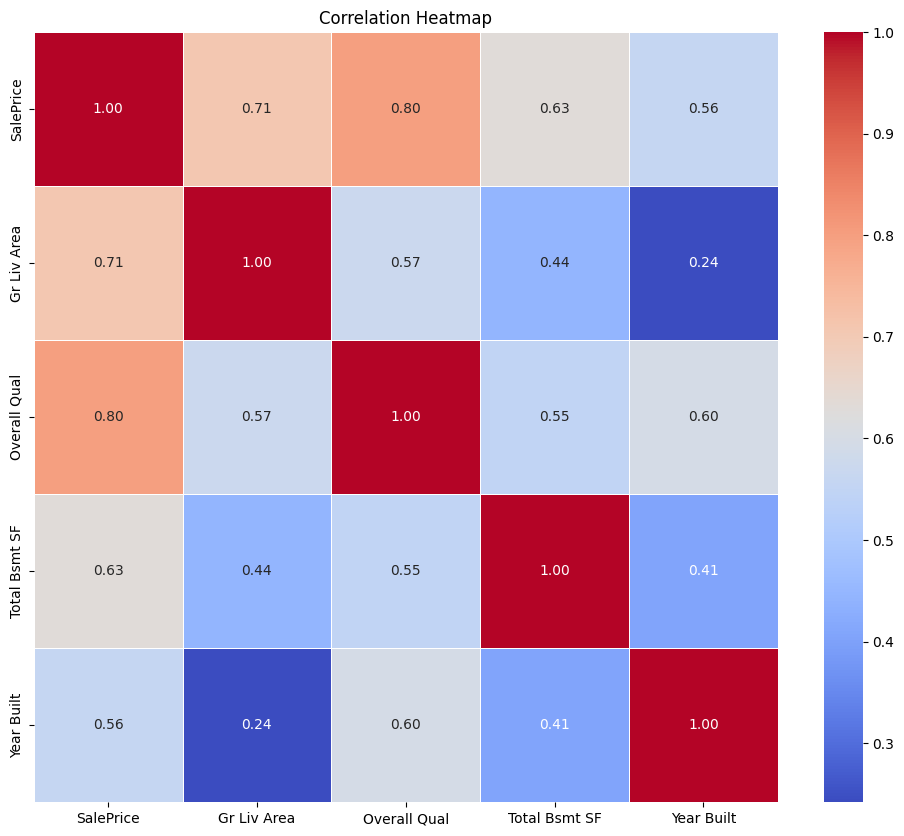

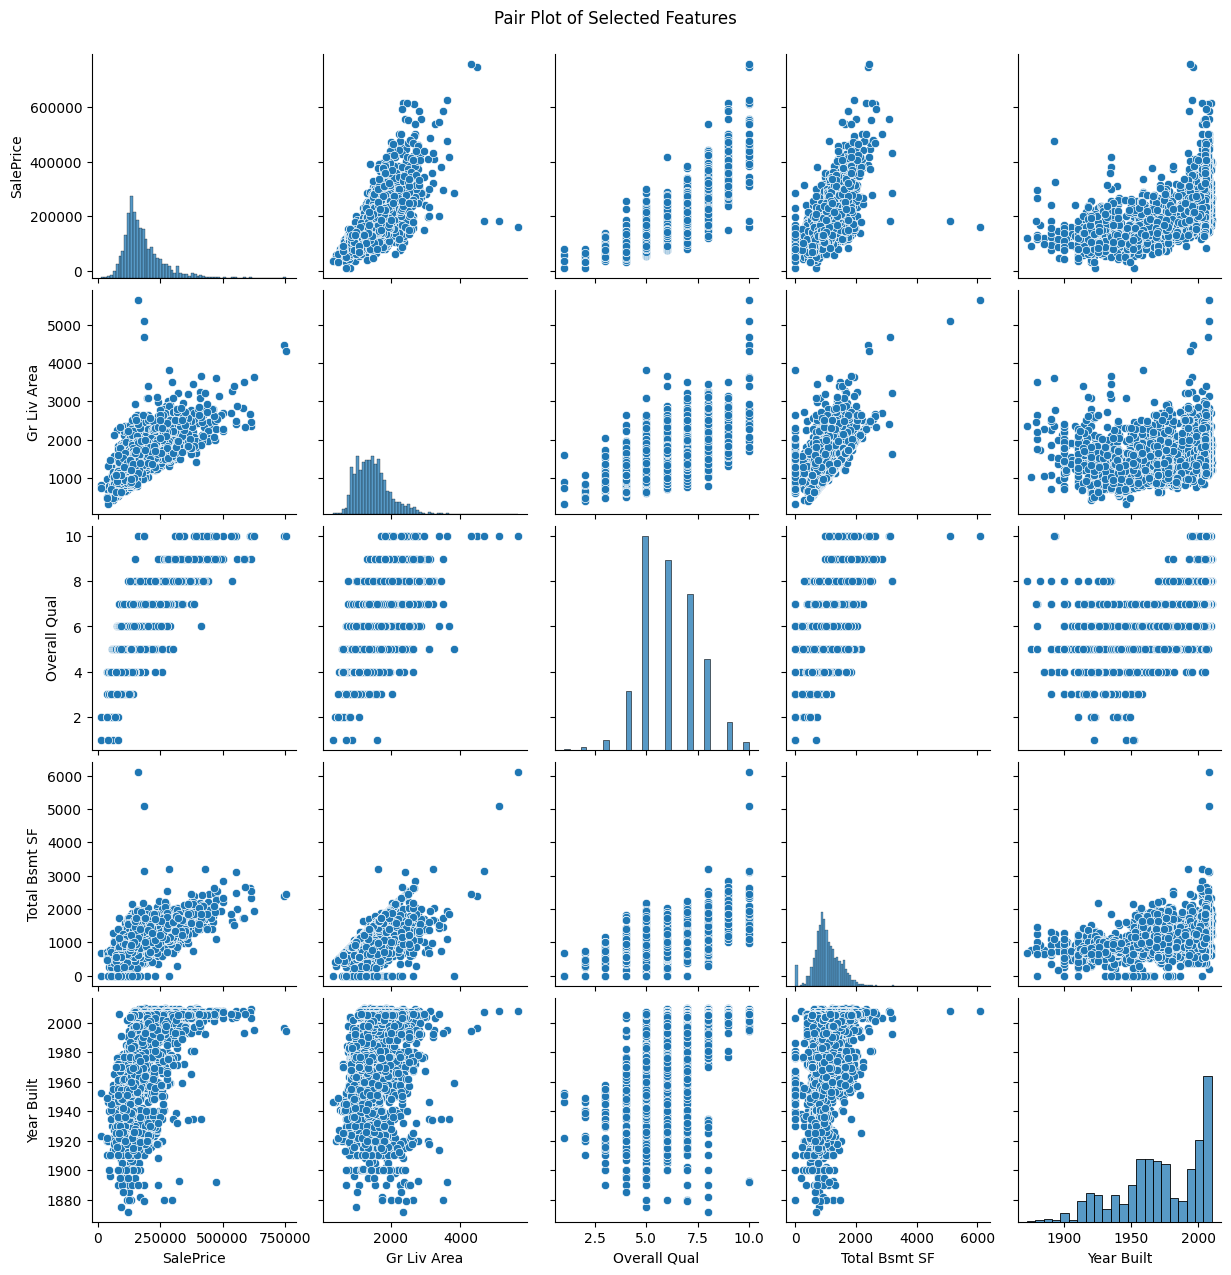

In [4]:
# Step 5 : Multivariate Analysis
# -------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis
multivariate_analyzer = SimpleMultivariateAnalysis()

#Select important features for the analysis
selected_features = df[['SalePrice','Gr Liv Area','Overall Qual','Total Bsmt SF','Year Built']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

## Insights from Multivariate Analysis

#### Correlation Heatmap:
1. **SalePrice and Overall Qual :**
  -  **Insights :** The highest correlation observed is between <span style = 'color : orange'>SalePrice</span>
  and <span style = 'color : orange'>Overall Qual</span>(0.80). This strong positive correlation indicates that the overall quality of the house is a significant determinant of its price.
  -  **Implication :**   <span style = 'color : orange'>Overall Qual</span> should be considered a key predictor in the model. The high correlation suggests that this feature explains a substantial portion of the variance in house prices
2. **SalePrice and Gr Liv Area:**
  -  **Insight:** The correlation between <span style = 'color : orange'>SalePrice</span> and <span style = 'color : orange'>Gr Liv Area</span> (0.71) is also strong , indicating that larger homes generally have higher sale prices.
  -  **Implication :** Similar to <span style = 'color : orange'>Overall Qual, Gr Liv Area</span> is another critical predictor of <span style = 'color : orange'>SalesPrice</span>. This realtionship aligns with the expectation that more living space increases a property's value.
3. **Total Bsmt SF :**
  -  **Insight :** The Corrlation between <span style = 'color : orange'>Total Bsmt SF</span> and <span style = 'color : orange'>SalePrice</span>(0.63) is moderate, suggesting that the size of the basement contributes to the overall value but not as strongly as living area or quality.
  -  **Implication :** <span style = 'color : orange'>Total Bsmt SF</span> is an important feature , but it may require further exploration or interaction with other features to capture its full effect.

4. **Year Bulit :**
  -  **Insights :** <span style = 'color : orange'>Year Built</span> has a lower correlation with <span style = 'color : orange'>SalePrice</span>(0.56).While newer homes tend to sell for more, this  relationship is less pronounced than those with living area or quality.
  -  **implication :** The age of the house is arelevant factor but might be more meaningful when combined with other features like <span style = 'color : orange'>Overall Qual</span> or <span style = 'color : orange'>Remod/Add Year</span>


## PairPlot :

1. **Linear Relationships:**
  -  **Insights :** The pair plots confirm linear relationships between <span style = "color : orange">SalePrice</span> and both <span style="color : orange">Gr Liv Area</span> and <span style="color:orange">Tota Bsmt SF</span>, supporting their inclusion as linear predictors in the model.
  -  **Implication :** These linear relationships suggests that linear models (or transformation) could effectively capture these predictors' contribute to <span style="color:orange">SalePrice</span>

2. **Discrete Distribution of Overall Qual :**
  -  **Insights:** <span style = "color:orange">Overall Qual</span> appears as discrete variable in the pairplots, with siginificant gaps between categories. This suggets that it is more ordinal in nature.
  - **implication :** Given its ordinal nature, <span style = "color:orange">Overall Qual</span> might be better treated as a categorical variable with ordered categories. This could improve the interpretability and performance of the model.
3. **Potential Multicollinearity :**
  -  **Insights :** The strong correlation between <span style = "color:orange">Gr Liv Area,Overall Qual,</span> and <span style = "color:orange">Total Bsmt SF</span> suggest potential multicollinearity, which colud inflate variance in model coefficients.
  -  **Implication:** Multicollinearity should be checked using Variance Inflation factor (VIF)analysis. If multicollinearity is confirmed, techniques like feature selection, regularization, or Prinicipal Component Analysis (PCA) might be needed.



## Issues to Address:
1. **Multicollinearity :**
  -  **Issue :** The high correlation between key predictors could lead to multicollinearity in regression models, which could skew the results and reduce model interpretability.
  -  **Action :** Conduct VIF analysis to check for multicollinearity, if detected, consider removing or combining correlated features, using regularization techniques, or applying PCA to reduce dimensionality.
2. **Feature Engineering :**
  -  **Issue :** Features like <span style = "color:orange">Overall Qual</span>, which is ordinal, might benefit from specific treatment (e.g., encoding as an ordinal varaible) rather than begin treated as continous.
  -  **Action :** Consider encoding <span style = "color:orange">Overall Qual</span> as an ordinal variable. Also, explore interaction between features like <span style = "color:orange">Gr Liv Area</span> and <span style = "color:orange">Total Bsmt SF</span> to capture more complex relationships.
3. **Outliers :**
  -  **Issue :** The pair plot indicates potential outliers, especially in <span style = "color:orange">Gr Liv Area</span> and <span style = "color:orange">SalePrice</span>. These could be high-leverage points that unduly influence model performance.
  -  **Action :** Identify and analyze outliers to detemine if they should be removed or if the model should be adjusted to account for them (e.g., using robust regression techniques).


